# Online Shoppers Purchasing Intention Clustering

Isaiah Jenkins

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

## 1. About the data

1. a. Description

Throughout this analysis we will explore online shoppers purchasing habits and online activity to achieve shopper segmentation. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

1. b. Attributes dictionary, 17 features, 10 numerical, 8 categorical

Administrative, Administrative Duration, Informational, Informational Duration, Product Related, Product Related Duration 
- The number of different types of pages visited by the visitor in that session and total time spent in each of these page categories
  
Bounce Rates, Exit Rates, Page Value
- Metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Special Day
- Indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

Month, Operating Systems, Browser, Traffic Type
- General information

Visitor Type 
- returning or new visitor category

Weekend
- Boolean value indicating whether the date of the visit is weekend
  
Revenue
- Whether shopper generated revenue for company

## 2. Objectives

Throughout this analysis we will explore and build different clustering models to segment between shoppers that did and did not buy products. A possible problems that could occur may include effective clustering because of fewer samples ending with shopping versus no shopping because 84.5% were negative class samples that did not end with shopping. However, with sophisticated clustering models we should be able to obtain proper segmentation.

## 3. Data Exploration, Cleaning and Feature Engineering

The Plan:

1. Explore the dataset's structure, including the number of rows, features, data types and any missing values.
2. Perform basic statistical analysis such as calculating descriptive statistics (mean, median) for numerical features and value counts for categorical features.
3. Create data visualizations such as box plots to visually inspect the distributions and relationships between variables to identify potential issues like outliers.
4. Feature engineer relevant columns for models to effectively segment between shoppers that shopped and did not shop.

### Load in data

In [2]:
shoppers = pd.read_csv('data/online_shoppers_intention.csv')

In [3]:
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# feature select
shoppers_features = shoppers.drop(['SpecialDay', 'Month', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue'], axis=1)

In [6]:
shoppers_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   OperatingSystems         12330 non-null  int64  
 10  VisitorType              12330 non-null  object 
dtypes: float64(6), int64(4), object(1)
memory usage: 1.0+ MB


In [7]:
# one hot encoding Vistor Tpye
shoppers_encoded = pd.get_dummies(shoppers_features, columns=['VisitorType'])
shoppers_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,1,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,2,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,4,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,3,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,3,False,False,True


In [8]:
shoppers_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   OperatingSystems               12330 non-null  int64  
 10  VisitorType_New_Visitor        12330 non-null  bool   
 11  VisitorType_Other              12330 non-null  bool   
 12  VisitorType_Returning_Visitor  12330 non-null 

In [9]:
# Check for correlations between features except categorical
non_categorical_features = [x for x in shoppers_encoded.columns if x not in ['VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']]

corr_matrix = shoppers_encoded[non_categorical_features].corr()

for i in range(len(non_categorical_features)):
    corr_matrix.iloc[i,i] = 0.0

corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems
Administrative,0.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.006347
Administrative_Duration,0.601583,0.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.007343
Informational,0.376850,0.302710,0.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.009527
Informational_Duration,0.255848,0.238031,0.618955,0.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.009579
ProductRelated,0.431119,0.289087,0.374164,0.280046,0.000000,0.860927,-0.204578,-0.292526,0.056282,0.004290
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,0.000000,-0.184541,-0.251984,0.052823,0.002976
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,0.000000,0.913004,-0.119386,0.023823
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,0.000000,-0.174498,0.014567
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,0.000000,0.018508
OperatingSystems,-0.006347,-0.007343,-0.009527,-0.009579,0.004290,0.002976,0.023823,0.014567,0.018508,0.000000


In [10]:
# Pairwise maximal correlations
corr_matrix.abs().idxmax()

Administrative             Administrative_Duration
Administrative_Duration             Administrative
Informational               Informational_Duration
Informational_Duration               Informational
ProductRelated             ProductRelated_Duration
ProductRelated_Duration             ProductRelated
BounceRates                              ExitRates
ExitRates                              BounceRates
PageValues                               ExitRates
OperatingSystems                       BounceRates
dtype: object

In [11]:
skewed_columns = (shoppers_encoded[non_categorical_features].skew().sort_values(ascending=False))
skewed_columns = skewed_columns.loc[skewed_columns >  0.75]
skewed_columns

Informational_Duration     7.579185
ProductRelated_Duration    7.263228
PageValues                 6.382964
Administrative_Duration    5.615719
ProductRelated             4.341516
Informational              4.036464
BounceRates                2.947855
ExitRates                  2.148789
OperatingSystems           2.066285
Administrative             1.960357
dtype: float64

In [12]:
# log transform skewed columns

for col in skewed_columns.index.tolist():
    shoppers_encoded[col] = np.log1p(shoppers_encoded[col])

In [13]:
# scale features to equalize weights since clustering algorithms generally rely on distance
ss = StandardScaler()
shoppers_encoded[non_categorical_features] = ss.fit_transform(shoppers_encoded[non_categorical_features])

shoppers_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.923678,-0.975402,-0.478085,-0.464858,-1.950729,-2.918505,3.629703,3.173418,-0.492303,-1.531728,False,False,True
1,-0.923678,-0.975402,-0.478085,-0.464858,-1.589955,-0.875249,-0.470378,1.217465,-0.492303,-0.013661,False,False,True
2,-0.923678,-0.975402,-0.478085,-0.464858,-1.950729,-2.918505,3.629703,3.173418,-0.492303,1.898877,False,False,True
3,-0.923678,-0.975402,-0.478085,-0.464858,-1.589955,-2.282539,0.626824,2.020382,-0.492303,1.063425,False,False,True
4,-0.923678,-0.975402,-0.478085,-0.464858,-0.433884,0.235343,-0.025053,0.171728,-0.492303,1.063425,False,False,True


/Users/isaiahjenkins/Documents/IBM Cert Coursework/UnsupervisedLearning/PurchasingIntentionClustering/env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/isaiahjenkins/Documents/IBM Cert Coursework/UnsupervisedLearning/PurchasingIntentionClustering/env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/isaiahjenkins/Documents/IBM Cert Coursework/UnsupervisedLearning/PurchasingIntentionClustering/env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/isaiahjenkins/Documents/IBM Cert Coursework/UnsupervisedLearning/PurchasingIntentionClustering/env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palett

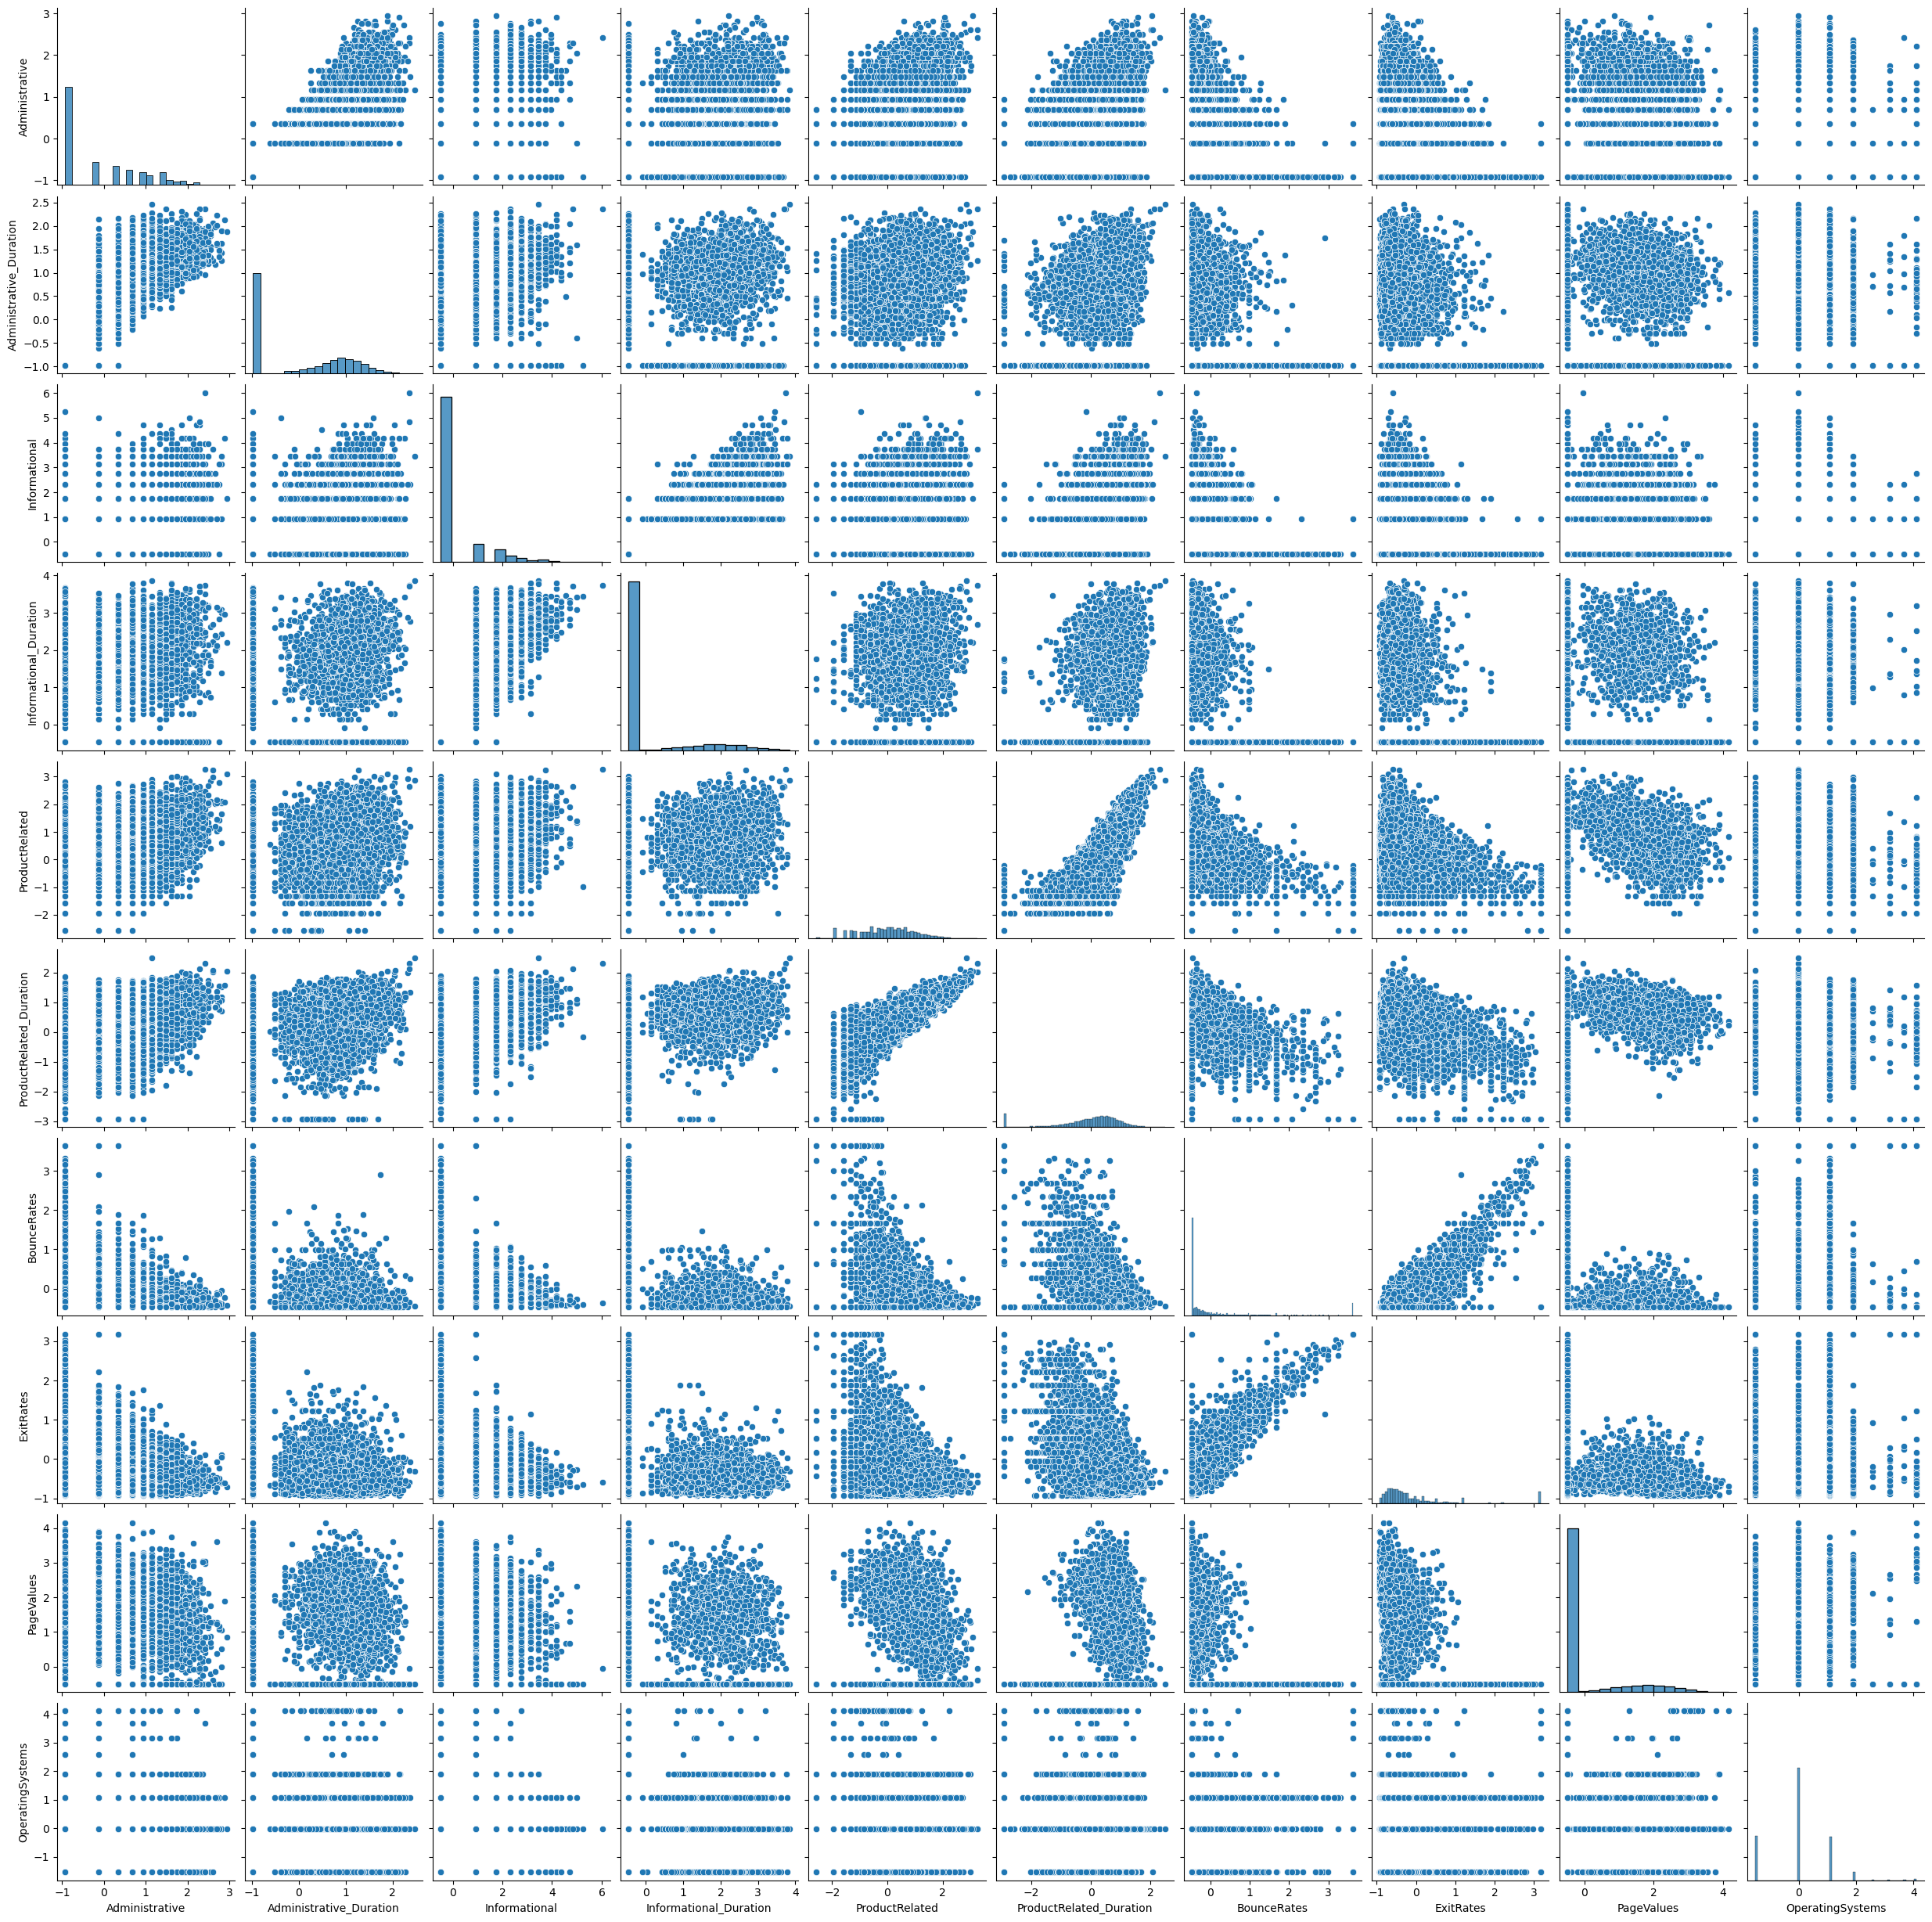

In [19]:
# pairplot scaled and transformed features
# custom colors
red = sns.color_palette()[2]
white = sns.color_palette()[4]

sns.pairplot(shoppers_encoded[non_categorical_features],
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':'red', 'white':'gray'})

## 4. Cluster Models

### Summary of Models

## 5. Insights and Key Findings

## 6. Next Steps